## Practica unidad 3 SVM 
### Estudiante: Sebastian Pesantez
### Docente: Vladimir Robles Bykbaev

In [1]:
# Importación de Bibliotecas
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

### Parámetros Globales

In [2]:
IMG_SIZE = (64, 64)
LABELS = ['triangle', 'circle', 'square']
DATASET_DIR = '/kaggle/input/ups-writing-skills/all-images'




Este bloque define los parámetros globales para el procesamiento de imágenes y la clasificación:

1. **IMG_SIZE**: El tamaño de las imágenes que serán redimensionadas a 64x64 píxeles.
2. **LABELS**: Lista con los nombres de las clases: 'triangle', 'circle', 'square', que representan las figuras geométricas que se clasificarán.
3. **DATASET_DIR**: Ruta del directorio donde se encuentran las imágenes del conjunto de datos (`ups-writing-skills`) en Kaggle.


### Recolectar Imágenes y Etiquetas


In [3]:
file_paths, targets = [], []
for idx, label in enumerate(LABELS):
    dir_path = os.path.join(DATASET_DIR, label)
    for fname in os.listdir(dir_path):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_paths.append(os.path.join(dir_path, fname))
            targets.append(idx)

print(f"Total imágenes: {len(file_paths)} | Clases: {LABELS}")


Total imágenes: 358 | Clases: ['triangle', 'circle', 'square']



Este bloque de código recorre el directorio del conjunto de datos (`DATASET_DIR`) y recolecta las imágenes y sus respectivas etiquetas:

1. **file_paths**: Lista que almacena las rutas completas de las imágenes en el conjunto de datos.
2. **targets**: Lista que almacena las etiquetas correspondientes a cada imagen, representadas por el índice de la clase (por ejemplo, 0 para 'triangle', 1 para 'circle', y 2 para 'square').
3. **Recorrido por las carpetas**: Se recorre cada clase en `LABELS` y se agregan las rutas de las imágenes `.jpg`, `.jpeg`, y `.png` a las listas `file_paths` y `targets`.

Finalmente, se imprime el número total de imágenes y las clases disponibles.


### Leer y Preprocesar Imágenes


In [4]:
def load_and_resize(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, IMG_SIZE)

images = [load_and_resize(fp) for fp in file_paths]



Este bloque define una función y utiliza una lista por comprensión para cargar y redimensionar las imágenes:

1. **`load_and_resize(path)`**: Función que recibe la ruta de una imagen, la carga en escala de grises usando `cv2.imread()` y luego la redimensiona al tamaño definido en `IMG_SIZE` (64x64 píxeles).
2. **`images`**: Lista que almacena todas las imágenes procesadas. Para cada ruta de archivo en `file_paths`, se llama a la función `load_and_resize()` y se agrega la imagen procesada a la lista `images`.


### Extraer Características HOG


In [5]:
def compute_hog(img):
    hog = cv2.HOGDescriptor(
        _winSize=IMG_SIZE,
        _blockSize=(16,16),
        _blockStride=(8,8),
        _cellSize=(8,8),
        _nbins=9
    )
    return hog.compute(img).flatten()

features = np.array([compute_hog(img) for img in images], dtype=np.float32)
labels = np.array(targets, dtype=np.int32)

print(f"Shape de features: {features.shape}")


Shape de features: (358, 1764)



Este bloque de código define una función para calcular las características HOG (Histograma de Gradientes Orientados) y las aplica a todas las imágenes:

1. **`compute_hog(img)`**: Función que recibe una imagen, crea un descriptor HOG con parámetros específicos (tamaño de ventana, tamaño de bloque, stride, tamaño de celda y número de bins) y calcula el descriptor HOG de la imagen, devolviendo un vector plano de características.
2. **`features`**: Lista de características HOG para todas las imágenes en el conjunto de datos. Se utiliza una lista por comprensión para calcular las características de cada imagen.
3. **`labels`**: Array de etiquetas correspondientes a cada imagen, tomadas de la lista `targets`.

Finalmente, se imprime la forma del array `features`, mostrando cuántas imágenes se procesaron y cuántas características tiene cada imagen.


### División de Datos


In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=7)


Este bloque de código divide el conjunto de datos en entrenamiento y prueba:

1. **`train_test_split`**: Función de scikit-learn que divide las características (`features`) y las etiquetas (`labels`) en conjuntos de entrenamiento y prueba. El 80% de los datos se usan para entrenamiento y el 20% para prueba (`test_size=0.2`).
2. **`X_train`, `X_test`**: Conjuntos de características de entrenamiento y prueba.
3. **`y_train`, `y_test`**: Conjuntos de etiquetas de entrenamiento y prueba.

Se establece una semilla aleatoria (`random_state=7`) para asegurar que la división sea reproducible.


### Normalización


In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Este bloque de código normaliza las características utilizando `MinMaxScaler`:

1. **`MinMaxScaler`**: Se crea un objeto `scaler` que normaliza las características para que estén en el rango de [0, 1].
2. **`X_train_scaled`**: Las características de entrenamiento se normalizan utilizando `fit_transform`, ajustando el escalador a los datos de entrenamiento.
3. **`X_test_scaled`**: Las características de prueba se normalizan utilizando `transform` para aplicar el mismo escalado que se utilizó en el conjunto de entrenamiento.

La normalización es importante cuando se usan algoritmos como SVM para evitar que características con diferentes escalas afecten el rendimiento del modelo.


### Entrenamiento SVM


In [8]:
clf = SVC(kernel='linear', C=1)
clf.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')


Este bloque de código entrena un clasificador SVM:

1. **`SVC(kernel='linear', C=1)`**: Se crea un clasificador SVM con un **kernel lineal** y un parámetro **C=1** (que controla el margen de clasificación).
2. **`clf.fit(X_train_scaled, y_train)`**: Se entrena el clasificador SVM utilizando las características de entrenamiento normalizadas (`X_train_scaled`) y las etiquetas de entrenamiento (`y_train`).

El clasificador SVM se ajusta para predecir las clases basadas en las características proporcionadas.


### Evaluación


In [9]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=LABELS))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    triangle       1.00      1.00      1.00        24
      circle       1.00      1.00      1.00        21
      square       1.00      1.00      1.00        27

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Matriz de confusión:
 [[24  0  0]
 [ 0 21  0]
 [ 0  0 27]]



Este bloque evalúa el rendimiento del modelo SVM:

1. **`y_pred = clf.predict(X_test_scaled)`**: Realiza predicciones sobre el conjunto de prueba utilizando el clasificador SVM entrenado.
2. **`classification_report(y_test, y_pred, target_names=LABELS)`**: Genera un reporte de clasificación que incluye métricas como la precisión, el recall y la puntuación F1 para cada clase.
3. **`confusion_matrix(y_test, y_pred)`**: Calcula la matriz de confusión, que muestra la comparación entre las clases verdaderas y las predicciones del modelo.

El reporte de clasificación y la matriz de confusión son útiles para evaluar la precisión y la capacidad de generalización del modelo.


### Validación Cruzada (KFold)


In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=7)
cv_scores = cross_val_score(clf, scaler.transform(features), labels, cv=kf)
print(f"Precisión media CV: {cv_scores.mean()*100:.2f}%")

Precisión media CV: 98.60%



Este bloque de código realiza una validación cruzada utilizando KFold:

1. **`KFold(n_splits=5, shuffle=True, random_state=7)`**: Se crea un objeto `KFold` para dividir los datos en 5 pliegues (splits), con barajado aleatorio y una semilla fija para asegurar la reproducibilidad.
2. **`cross_val_score(clf, scaler.transform(features), labels, cv=kf)`**: Realiza la validación cruzada utilizando el clasificador SVM (`clf`) con las características escaladas (`scaler.transform(features)`) y las etiquetas (`labels`), evaluando en cada uno de los 5 pliegues.
3. **`cv_scores.mean()*100`**: Calcula la precisión media de la validación cruzada, mostrando el rendimiento del modelo en los diferentes pliegues.

Este proceso permite evaluar la capacidad de generalización del modelo SVM en diferentes subconjuntos de los datos.


### Generación de Imágenes Sintéticas


In [11]:
def make_noisy_shape(shape):
    canvas = np.zeros(IMG_SIZE, dtype=np.uint8)
    if shape == 'circle':
        center = tuple(np.random.randint(20, 44, 2))
        radius = np.random.randint(18, 26)
        cv2.circle(canvas, center, radius, 255, 2, cv2.LINE_AA)
    elif shape == 'square':
        s = np.random.randint(28, 40)
        x, y = np.random.randint(0, IMG_SIZE[0]-s), np.random.randint(0, IMG_SIZE[1]-s)
        pts = np.array([
            [x+np.random.randint(-2,2), y+np.random.randint(-2,2)],
            [x+s+np.random.randint(-2,2), y+np.random.randint(-2,2)],
            [x+s+np.random.randint(-2,2), y+s+np.random.randint(-2,2)],
            [x+np.random.randint(-2,2), y+s+np.random.randint(-2,2)]
        ], np.int32)
        cv2.polylines(canvas, [pts], True, 255, 2, cv2.LINE_AA)
    else: # triangle
        base = np.random.randint(30, 44)
        h = int(base * np.sqrt(3) / 2)
        x, y = np.random.randint(0, IMG_SIZE[0]-base), np.random.randint(0, IMG_SIZE[1]-h)
        pts = np.array([
            [x+base//2+np.random.randint(-2,2), y+np.random.randint(-2,2)],
            [x+np.random.randint(-2,2), y+h+np.random.randint(-2,2)],
            [x+base+np.random.randint(-2,2), y+h+np.random.randint(-2,2)]
        ], np.int32)
        cv2.polylines(canvas, [pts], True, 255, 2, cv2.LINE_AA)
    return canvas

synthetic_imgs, synthetic_lbls = [], []
for idx, label in enumerate(LABELS):
    for _ in range(5):
        synthetic_imgs.append(make_noisy_shape(label))
        synthetic_lbls.append(idx)



Este bloque de código crea imágenes sintéticas con figuras geométricas (círculo, cuadrado, triángulo) con imperfecciones, simulando variabilidad en los trazos:

1. **`make_noisy_shape(shape)`**: Función que recibe una figura (círculo, cuadrado o triángulo) y la dibuja en una imagen en blanco (`canvas`), agregando un pequeño ruido a sus coordenadas o tamaño para simular imperfecciones.
   - **Círculo**: Se genera un círculo con un centro aleatorio y un radio aleatorio.
   - **Cuadrado**: Se genera un cuadrado con vértices aleatorios para crear variabilidad.
   - **Triángulo**: Se genera un triángulo equilátero con variabilidad en los vértices.

2. **`synthetic_imgs` y `synthetic_lbls`**: Se crean 5 imágenes sintéticas por clase y se almacenan en estas listas. Las imágenes contienen figuras con ruido y sus etiquetas correspondientes.

Estas imágenes sintéticas ayudan a mejorar la capacidad de generalización del modelo al simular variabilidad en las figuras.


### Visualización de Imágenes Sintéticas


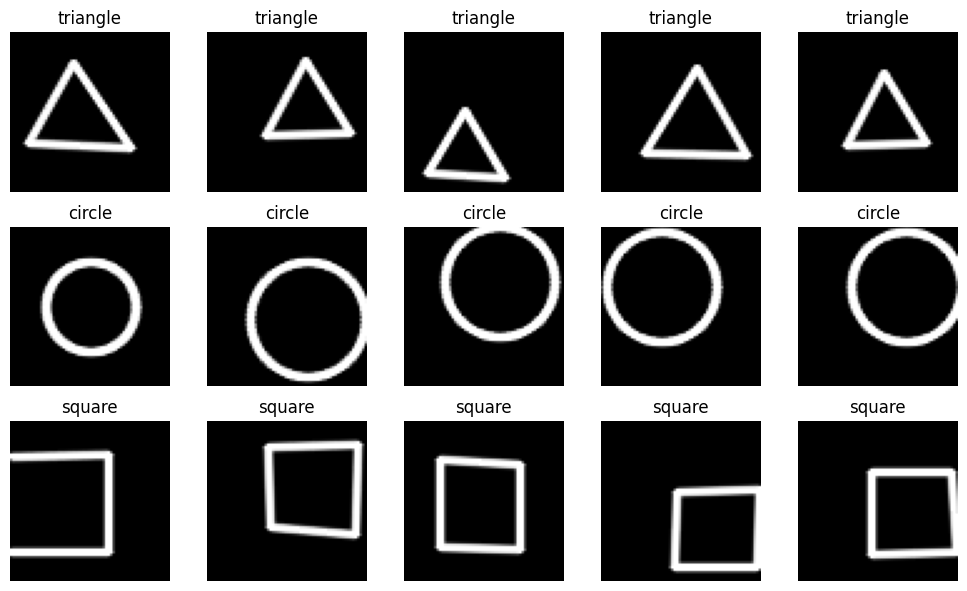

In [12]:
fig, axs = plt.subplots(3, 5, figsize=(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(synthetic_imgs[i], cmap='gray')
    ax.set_title(LABELS[synthetic_lbls[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()


Este bloque de código visualiza las imágenes sintéticas generadas:

1. **`fig, axs = plt.subplots(3, 5, figsize=(10,6))`**: Crea una cuadrícula de 3 filas y 5 columnas para mostrar las imágenes sintéticas generadas.
2. **`ax.imshow(synthetic_imgs[i], cmap='gray')`**: Muestra cada imagen sintética en escala de grises.
3. **`ax.set_title(LABELS[synthetic_lbls[i]])`**: Asigna el título a cada imagen, que corresponde a su clase (círculo, cuadrado, triángulo).
4. **`ax.axis('off')`**: Oculta los ejes para una visualización más limpia.

El resultado es una cuadrícula con 15 imágenes sintéticas, mostrando figuras con variabilidad y ruido en sus contornos.


### Predicción sobre Imágenes Sintéticas


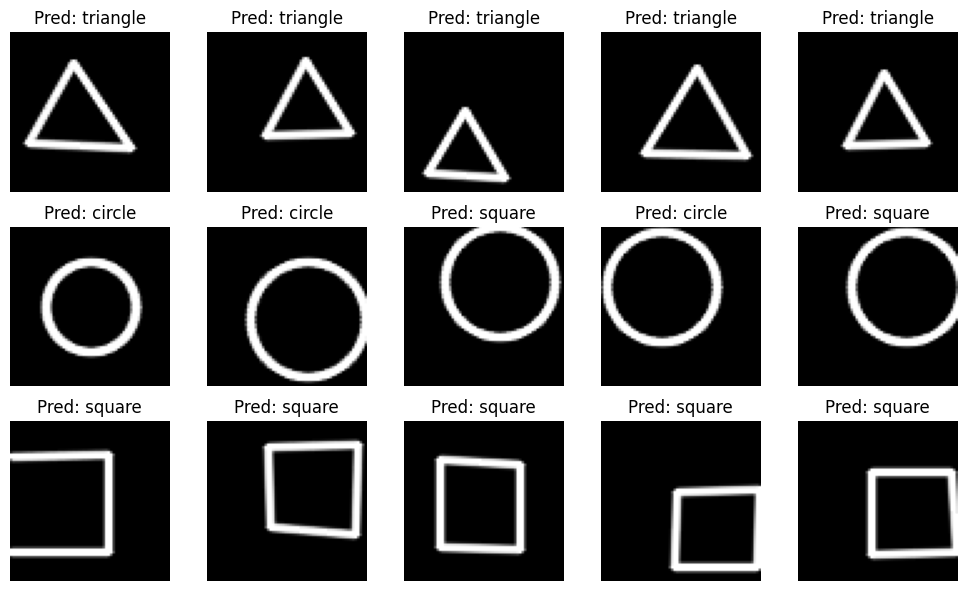

In [13]:
synthetic_feats = np.array([compute_hog(img) for img in synthetic_imgs], dtype=np.float32)
synthetic_feats_scaled = scaler.transform(synthetic_feats)
synthetic_preds = clf.predict(synthetic_feats_scaled)

fig, axs = plt.subplots(3, 5, figsize=(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(synthetic_imgs[i], cmap='gray')
    ax.set_title(f"Pred: {LABELS[synthetic_preds[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


Este bloque de código realiza predicciones sobre las imágenes sintéticas utilizando el modelo SVM entrenado:

1. **`synthetic_feats = np.array([compute_hog(img) for img in synthetic_imgs], dtype=np.float32)`**: Calcula las características HOG para cada imagen sintética generada.
2. **`synthetic_feats_scaled = scaler.transform(synthetic_feats)`**: Normaliza las características HOG de las imágenes sintéticas utilizando el mismo escalador que se utilizó para el conjunto de entrenamiento.
3. **`synthetic_preds = clf.predict(synthetic_feats_scaled)`**: Realiza las predicciones sobre las imágenes sintéticas utilizando el clasificador SVM entrenado.

Las imágenes sintéticas se muestran en una cuadrícula con sus respectivas predicciones en el título, indicando la clase predicha para cada imagen.
